# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
* In which locations have bike rentals been increasing the fastest? 
* In which locations or countries is bike sharing the most popular (as a percentage of the overall population of that location/country)

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Ctrl** + **Enter**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
import csv
from datetime import datetime # for date parsing
from pprint import pprint # A better formatted print for data structs
import pandas as pd
from glob import glob
import re

In [2]:
# Helper functions and re-used data_structures/variables used throughout this notebook

# Raw data files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv']

# The cleaned/normalized datafiles we will be using to do statistical analysis with and draw graphs
summary_data_files = glob('./data/*Summary.csv')

def add_examples(data):
    """Modifes and returns data adding files in the examples folder"""
    # take out dupes
    return list(set(data + glob('./examples/*Summary.csv')))

def remove_examples(data):
    """Returns data with any Summary csv files in the examples folder omitted"""
    return [i for i in data if i not in glob('./examples/*Summary.csv')]
    
def parse_city(filename):
    """Returns the location(normally city except for the examples case) part of the filename"""
    return re.search('./(?:\w+)/(\w+)-.*', filename).group(1)

# summary_data_files = add_examples(summary_data_files)

In [3]:
# peek at the raw data
for f in data_files:
    df = pd.read_csv(f).head(n=1)
    # use city for row Index not 0 (strictly done for display reasons here)
    df.index = pd.Index([parse_city(f)])
    display(df)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
NYC,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
Chicago,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0


,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
Washington,427387,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered


In [4]:
# to keep it functional I changed this functions behavior (it no longer prints)
# and the name to reflect this change (the print_ prefix was removed)
def first_point(filename):
    """
    This function receives a csv file and returns a tuple containing:
      - (string) The city name parsed from the filename and
      - (dict)   The first row of data after the heading row from filename with keys matching header columns
    """
    city = parse_city(filename)    
    # used pandas DataFrame instead of csv.DictReader(file_handle) here
    df = pd.read_csv(filename).head(n=1)
    # https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html
    return city, df.to_dict('index')[0]

# Print the first trip from each file and store it in a dictionary for later reference.
example_trips = {}
for file in data_files:
    city, first_trip = first_point(file)
    example_trips[city] = first_trip

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [5]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """

    if city == 'Washington':
        duration = int(datum['Duration (ms)']) / (1000 * 60)
    elif city == 'Chicago' or city == 'NYC':
        duration = int(datum['tripduration']) / 60
    else:
        duration = 0

    return float(duration)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833, 'Chicago': 15.4333, 'Washington': 7.1231}

# Added an AssertionError check incase the test fails we get more info
for city in tests:
    try: 
        #assert duration_in_mins(example_trips[city], city) == tests[city]
        assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001
    except AssertionError as e:
        print("Assertion failed.  Expected:  {}    Received:  {}".
              format(tests[city], duration_in_mins(example_trips[city], city)))

In [6]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.

    Remember that NYC includes seconds, while Washington and Chicago do not.

    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """

    # ... From the python docs ... 
    # %m  =  Month as a zero-padded decimal number.
    # %d  =  Day of the month as a zero-padded decimal number.
    # %Y  =  Year with century as a decimal number.    0001, 0002, …, 2013, 2014, …, 9998, 9999
    # %H  =  Hour (24-hour clock) as a zero-padded decimal number.    00, 01, …, 23
    # %M  =  Minute as a zero-padded decimal number.    00, 01, …, 59
    # %S  =  Second as a zero-padded decimal number.    00, 01, …, 59
    # %A  =  Weekday as locale’s full name.    Sunday, Monday, …, Saturday (en_US);

    date = None

#     pprint(datum)

    if city == 'Washington':
        date = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')
    elif city == "Chicago":
        date = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
    elif city == 'NYC':
        date = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M:%S')
    else:
        return 0, 0, 0

#     print(date.month, date.hour, date.strftime('%A'))
    
    # month, hour, day_of_week (as string)
    return date.month, date.hour, date.strftime('%A')


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [7]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.

    Remember that Washington has different category names compared to Chicago
    and NYC.
    """
    # use get(key) instead of indexing with [key] so we get None 
    # and not an exception if it doesn't exist 
    user_type = datum.get('usertype')
    
    # it seems that I could use a ternary here but the case is a bit too complex for one
    # a if condition else b

    if user_type == None:
        if datum.get('Member Type') == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'

    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer', 'Chicago': 'Subscriber', 'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [8]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.

    HINT: See the cell below to see how the arguments are structured!
    """

    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # specify & print csv header
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']
        trip_writer = csv.DictWriter(f_out, fieldnames=out_colnames)
        trip_writer.writeheader()

        # setup reader
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            month, hour, dow = time_of_trip(row, city)
            new_point = {'duration': duration_in_mins(row, city),
                         'month': month,
                         'hour': hour,
                         'day_of_week': dow,
                         'user_type': type_of_user(row, city)
                         }
            trip_writer.writerow(new_point)
            
            

In [9]:
# Test condense_data() here.  Verify the output matches what we expect.

# Removed hard coded city_info and generate one instead in an attempt to DRY up the code a bit
city_info = {}
for file in data_files:
    city = parse_city(file)
    city_info[city] = {'in_file': file,
                       'out_file': './data/{}-2016-Summary.csv'.format(city)}

print("Normalizing data across differing data sources and displaying the first record of each below.")
for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    city, row = first_point(filenames['out_file'])
    display(pd.DataFrame(data=row,index=[city]))

Normalizing data across differing data sources and displaying the first record of each below.


,day_of_week,duration,hour,month,user_type
NYC,Friday,13.983333,0,1,Customer


,day_of_week,duration,hour,month,user_type
Chicago,Thursday,15.433333,23,3,Subscriber


,day_of_week,duration,hour,month,user_type
Washington,Thursday,7.123117,22,3,Subscriber


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some stats to answer the different parts of question 4.

In [10]:
def gen_bike_stats(summary_data_files, long_trip):
    """Generate a nested dict containing calculated stats we care about from the bike summary data"""
    # csv fields ['duration', 'month', 'hour', 'day_of_week', 'user_type']
    stats = {}
    for filepath in summary_data_files:
        df = pd.read_csv(filepath)
        # Extract location(city) from file name
        location = parse_city(filepath)
        stats[location] = {}
        # the column name when followed by .count will be considered arbitrary for our purposes,
        # we just want the row count (of one column [aka a single value], not all columns [aka a list]
        # which is what we'd get if we did df.count()). All columns contain the same number of rows
        # so we just need to pick one, which one doesn't matter
        stats[location]['count'] = df.user_type.count()
        stats[location]['long_trips'] = len([i for i in df.duration if i > long_trip])
        stats[location]['pct_long_trips'] = stats[location]['long_trips'] / stats[location]['count']
        stats[location]['avg_trip_time'] = df.duration.sum() / stats[location]['count']
        for user_type in ['Subscriber', 'Customer']:
            user_type_stats = {}
            users = df[df.user_type == user_type]  # a DataFrame containing only records having user_type of user_type
            user_type_stats['count'] = users.user_type.count()
            user_type_stats['long_trips'] = len([i for i in users.duration if i > long_trip])
            user_type_stats['pct_long_trips'] = user_type_stats['long_trips'] / user_type_stats['count']
            user_type_stats['avg_trip_time'] = users.duration.sum() / user_type_stats['count']
            user_type_stats['pct_total'] = user_type_stats['count'] / stats[location]['count']
            stats[location][user_type] = user_type_stats
    return stats


In [11]:
# I realize this function is needlessly complex, however it was constructed this way to serve as
# a teaching exercise for myself more than anything ... my apologies to the reviewer ... :'(
def q4a(stats):
    """Collect answers to the 3 parts of question 4a"""

    # Notes for test() and answer_data_fn()
    # could use a lambda but that's not DRY
    # could assign to a variable but pep8 says if you're gonna do that use a nested function
    def test():
        if 'answer_data' not in part:
            part['answer_data'] = (location, part['stat']())
            # print("Initialized answer_data to: {}".format(part['answer_data']))
        # print("is {} > {} ?".format(part['stat'](), part['answer_data'][1]))
        # and finally the actual logic of the test to answer this part of the question
        return part['stat']() > part['answer_data'][1]

    def answer_data_fn():
        return location, part['stat']()

    question_parts = [
        {'question': 'Which city has the highest number of trips?',
         'answer': "{} has the highest trip count at {:,}",
         'stat': lambda: stats[location]['count'],
         'answer_data_fn': answer_data_fn,
         'test': test},
        {'question': 'Which city has the highest proportion of trips made by subscribers?',
         'answer': "{} has the highest % of subscriber trips at {:.2%}",
         'stat': lambda: stats[location]['Subscriber']['pct_total'],
         'answer_data_fn': answer_data_fn,
         'test': test},
        {'question': 'Which city has the highest proportion of trips made by short-term customers?',
         'answer': "{} has the highest % of customer trips at {:.2%}",
         'stat': lambda: stats[location]['Customer']['pct_total'],
         'answer_data_fn': answer_data_fn,
         'test': test}
]
    for part in question_parts:
        print(part['question'])
        for location in stats:
            # print('Checking {}'.format(location))
            if part['test']():
                part['answer_data'] = part['answer_data_fn']()
        print(part['answer'].format(*part['answer_data']) + "\n")  # unpack answer_data tuple for format for answer

In [12]:
# Generate bike stats for use in answering question 4 parts handled in q4a (question 4 answers)
stats = gen_bike_stats(summary_data_files, 30)  # the intro says trips > 30 min are long
q4a(stats)

Which city has the highest number of trips?
NYC has the highest trip count at 276,081

Which city has the highest proportion of trips made by subscribers?
NYC has the highest % of subscriber trips at 89.07%

Which city has the highest proportion of trips made by short-term customers?
Chicago has the highest % of customer trips at 23.77%



**Question 4a**: 
* Which city has the highest number of trips? 
* Which city has the highest proportion of trips made by subscribers? 
* Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC, NYC, Chicago

In [13]:
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

# we are asked to compare city data with example data, so add example data to the data we get stats on
summary_data_files = add_examples(summary_data_files)
stats = gen_bike_stats(summary_data_files, 30)  # the intro says trips > 30 min are long

# I'm getting lazy here, I'm just gonna read out the answers & type it in ... 
pprint(stats)

{'Chicago': {'Customer': {'avg_trip_time': 30.979781133982542,
                          'count': 17149,
                          'long_trips': 4834,
                          'pct_long_trips': 0.28188232550002917,
                          'pct_total': 0.23774798630269925},
             'Subscriber': {'avg_trip_time': 12.067201690250142,
                            'count': 54982,
                            'long_trips': 1176,
                            'pct_long_trips': 0.021388818158670109,
                            'pct_total': 0.76225201369730078},
             'avg_trip_time': 16.563629368787343,
             'count': 72131,
             'long_trips': 6010,
             'pct_long_trips': 0.083320624974005622},
 'NYC': {'Customer': {'avg_trip_time': 32.982004306774883,
                      'count': 30185,
                      'long_trips': 6965,
                      'pct_long_trips': 0.23074374689415272,
                      'pct_total': 0.1093338549193896},
         'Sub

> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**:  
* avg_trip_time (NYC:15.85, Washington: 18.93, Chicago: 16.56, BayArea: 14.04)  in minutes
* pct_long_trip  (NYC: 7.32, Washington: 10.83, Chicago: 8.33, BayArea: 3.52)   as a percentage

**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Percentages of long trips by user_type by city
* BayArea - Customer: 29.86% , Subscriber: .58%
* Chicago - Customer: 28.19% , Subscriber: 2.14%
* NYC - Customer: 23.07% , Subscriber: 5.34%
* Washington - Customer: 23.07% , Subscriber: 5.34%

<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

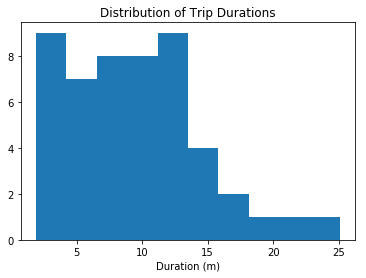

In [14]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

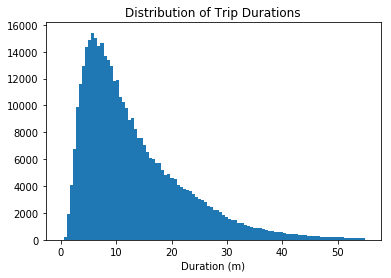

In [15]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
data = []
for filepath in summary_data_files:
    df = pd.read_csv(filepath)
    data.extend(df.duration.tolist())
    
# print(max(data))
# print(min(data))

# eyeballing what looks like a valid range and # of bins to make it fit & be smooth enough
n, bins, patches = plt.hist(data, range=(0,55), bins=100)
# print("n: {}".format(n))
# print("bins: {}".format(bins))
# print("patches: {}".format(patches))
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Both customer and subscriber are unimodal but the customer graph seems to have fatter right hand tail.  the subscriber graph peaks between 5 and 10 minutes while the customer graph peaks between 15 and 25 minutes so the peak is sustained for longer it seems with customers. The customer graph seems to be more symmetrical but neither are completely symmetrical.  Both customer and subscriber graphs seem to have a positve skew, meaning the tail follows the peak in both cases.  

<img src="http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png" alt="Distribution types" style="width: 400px;float:left;"/> 
<i>Q: How would you describe the shape of each distribution?</i><br>
The shape of the plot seems to be "log normal" but I'm not sure honestly.
I am guessing based on the image to the left.
<br><b>How would I determine this definitively?</b>
<br><br>See the graphs below for the answers to the rest of the questions.

In [16]:
%%javascript
// disable auto scrolling so our upcoming graphs don't get squished into scrolling text boxes.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

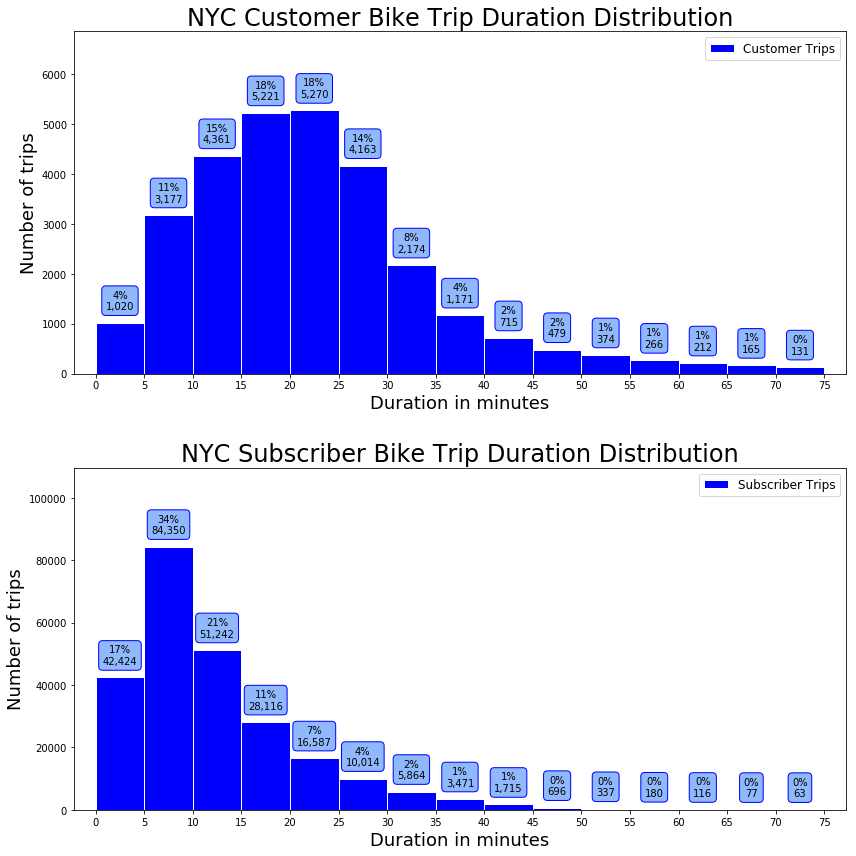

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np

'''
Question 5: Use the parameters of the .hist() function to perform the following in your selected city:
* Plot the distribution of trip times for the Subscribers
* Plot the distribution of trip times for the Customers
* Add limits to the plots so that only trips of duration less than 75 minutes are plotted
* (bonus) Set the plots up so that bars are in five-minute wide intervals
For each group, where is the peak of each distribution? 
How would you describe the shape of each distribution?
'''

def draw_graph(plt,subplot,df,user_type):
    data = df[df.user_type == user_type].duration.tolist()
    # not concise or robust enough IMO but provided good direction on my journey
    # https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
    counts, bins, patches = subplot.hist(
        data, bins=range(0, 76, 5), facecolor='blue', edgecolor='white', label='{} Trips'.format(user_type))
    subplot.set_xticks(bins)  # display tick mark for each bin (bins = [0,5,10,...])
    subplot.set_title('NYC {} Bike Trip Duration Distribution'.format(user_type), fontsize=24)
    subplot.margins(x=.03, y=.30)  # space top & sides of hist from graph box so it flows
    # why I can't call these methods on subplot is beyond me ...
    plt.legend(loc='upper right', fontsize=12)
    plt.xlabel('Duration in minutes', fontsize=18)
    plt.ylabel('Number of trips', fontsize=18)
    plt.tight_layout(h_pad=3)
    # Label the bins with percentages and raw counts in a floating box above each bin
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        detail_text = "{:.0%}\n{:,}".format(count/counts.sum(), int(count))
        box_props = {'facecolor':'#8fb9fc', 'edgecolor':'blue', 'pad':.4, 'boxstyle':"round"}
        y = count+max(counts)*.05
        subplot.text(x, y, detail_text, ha='center', bbox=box_props)

df = pd.read_csv('./data/NYC-2016-Summary.csv')
# two (sub)plots, one for customers & one for subscribers. stacked (2 rows, 1 col)
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(nrows=2, ncols=1)

draw_graph(plt, plt.subplot(gs[0]), df, 'Customer')
draw_graph(plt, plt.subplot(gs[1]), df, 'Subscriber')


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Replace this text with your responses and include a visualization below!

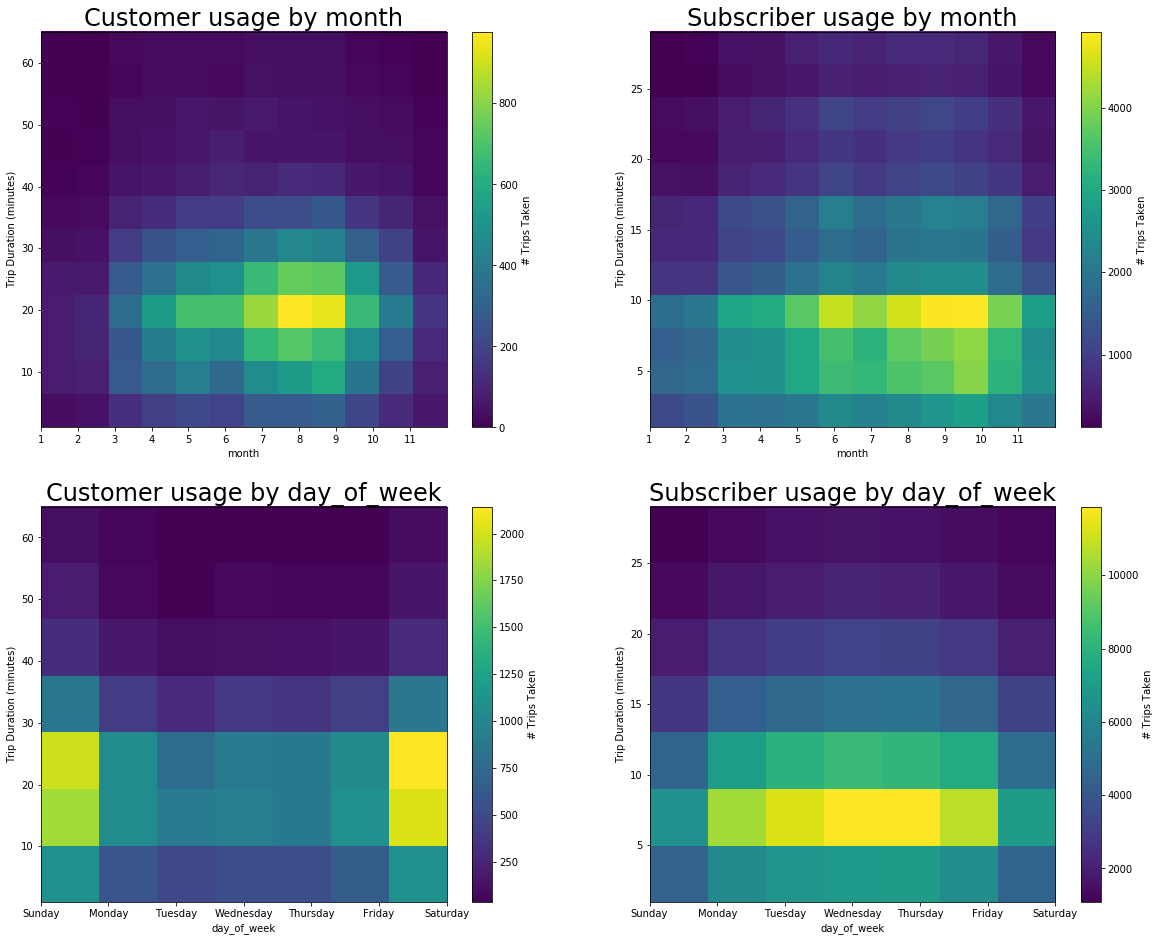

In [18]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

months = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

def hist2d_1st_try(subplot, df, by='month'):
    """
    False_color/heat_map of duration by (month | day of week).  The false
    color shows the frequency of trips of a given duration by month or day of week
    
    This version of the function assigns an integer to the bins arg of hist2d()
    """
    subplot.set_title('{} usage by {}'.format(str.title(df.user_type.iloc[0]), by), fontsize=24)
    # exclude outliers (top 5% of durations)
    max_duration = int(np.percentile(df.duration, 95))
    df = df[df.duration < max_duration]

    # if string it's a day of week, must convert to integer for plotting
    # ironic considering this was converted to a string for normalization ...
    # if this was more real world I would probably reformulate the summary format
    if isinstance(df.get(by).iloc[0], str):
        x = [days.index(i) for i in df.get(by)]
        # the tick marks don't line up with the bins and the
        # recomended way to fix this (range(7)) screws up my chart ...
        plt.xticks(range(7), days)
        bins = 7
    else:
        x = [int(i) for i in df.get(by)]
        plt.xticks(range(12))
        bins = 12

    y = [int(i) for i in df.duration]

    # customers by duration by month
    plt.hist2d(x, y, bins=bins)
    plt.colorbar(label='# Trips Taken')
    plt.xlabel(by)
    plt.ylabel("Trip Duration (minutes)")

def hist2d_2nd_try(ax, df, by='month'):
    """
    false_color/heat_map of duration by (month | day of week).  The false
    color shows the frequency of trips of a given duration by month or day of week
       
    This version of the function attempts to calculate the number of bins for each dimension
    and then those are passed as the bins arg of hist2d()
    """
    ax.set_title('{} usage by {}'.format(str.title(df.user_type.iloc[0]), by), fontsize=20)
    # exclude outliers (top 5% of durations)
    max_duration = int(np.percentile(df.duration, 95))
    df = df[df.duration < max_duration]

    y = [int(i) for i in df.duration]

    if by == 'day_of_week':
        x = [days.index(i) for i in df.get(by)]
        mx, my = max(x), max(y)
        plt.xticks(range(7), days)  # x-axis num to days string
        # - 0.5 shifts the tick marks to the middle of the columns
        xbins = np.arange(mx+2) - 0.5  # range(max(x)+2)
        ybins = np.arange(1, my+2, max_duration/(mx+1))  # range(1, max(y)+2, int(max_duration/(max(x)+1)))
    elif by == 'month':
        x = [int(i) for i in df.get(by)]
        mx, my = max(x), max(y)
        plt.xticks(range(13), months)
        xbins = np.arange(1, mx+2) - 0.5  # range(1, max(x)+2)
        ybins = np.arange(1, my+2, max_duration/(mx+1))  # range(1, max(y) + 2, int(max_duration / (max(x) + 1)))

    plt.hist2d(x, y, bins=[xbins, ybins])
    plt.colorbar(label='# Trips Taken')
    plt.xlabel(by, fontsize=14)
    plt.ylabel("Trip Duration (minutes)")

# df cols (duration, month, hour, day_of_week, user_type)
df = pd.read_csv('./data/NYC-2016-Summary.csv')

fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(nrows=2, ncols=2)

hist2d_1st_try(plt.subplot(gs[0]), df[df.user_type == 'Customer'], by='month')
hist2d_1st_try(plt.subplot(gs[1]), df[df.user_type == 'Subscriber'], by='month')
hist2d_1st_try(plt.subplot(gs[2]), df[df.user_type == 'Customer'], by='day_of_week')
hist2d_1st_try(plt.subplot(gs[3]), df[df.user_type == 'Subscriber'], by='day_of_week')


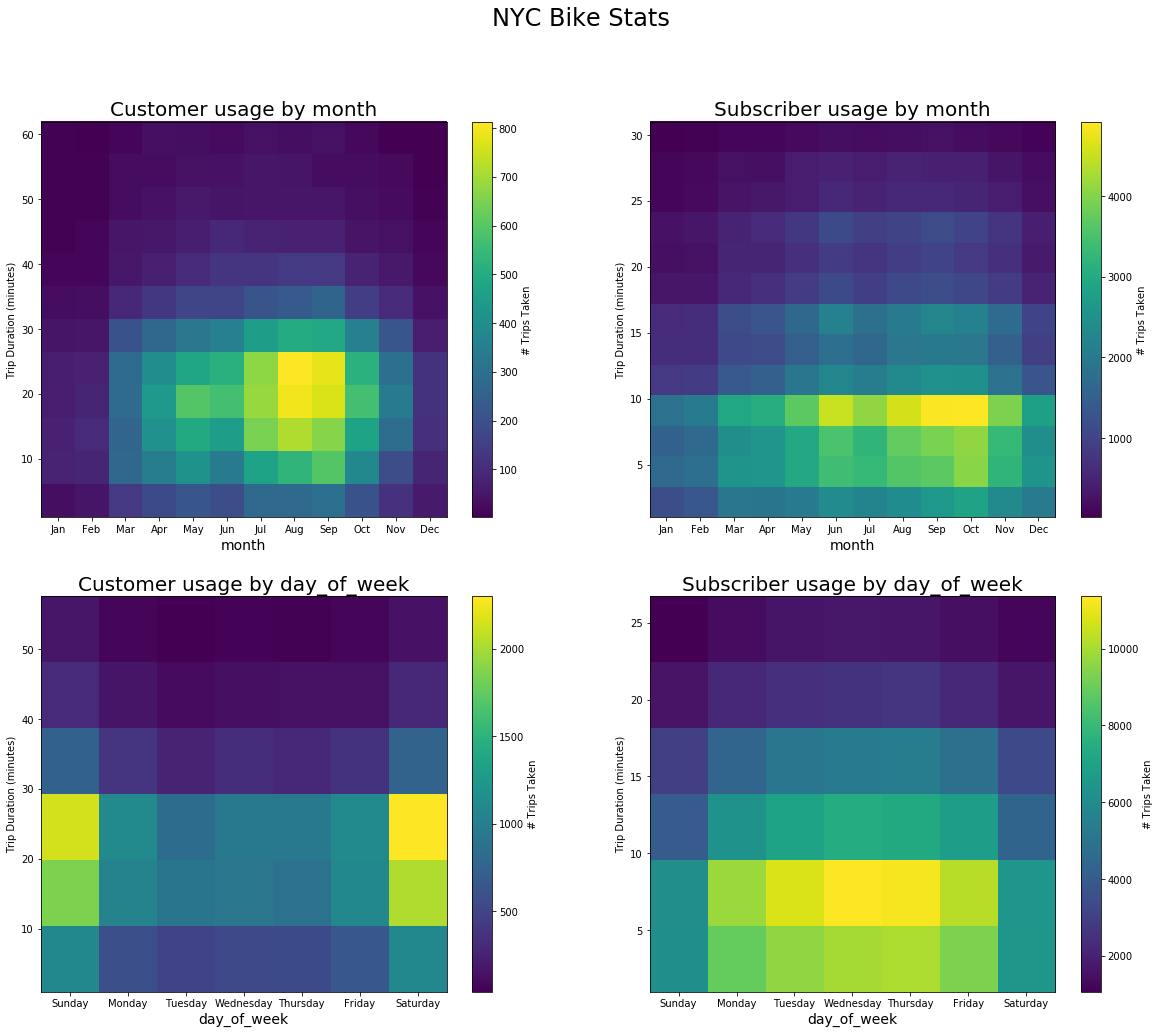

In [19]:
fig = plt.figure(figsize=(20, 16))
plt.suptitle('NYC Bike Stats', fontsize=24)
gs = gridspec.GridSpec(nrows=2, ncols=2)

hist2d_2nd_try(plt.subplot(gs[0]), df[df.user_type == 'Customer'], by='month')
hist2d_2nd_try(plt.subplot(gs[1]), df[df.user_type == 'Subscriber'], by='month')
hist2d_2nd_try(plt.subplot(gs[2]), df[df.user_type == 'Customer'], by='day_of_week')
hist2d_2nd_try(plt.subplot(gs[3]), df[df.user_type == 'Subscriber'], by='day_of_week')


# Questions for the reviewer:
> ### The goal of the 2nd attempt was to align the x tick marks but this changed the graph, ... why?    Should I have approached this goal differently?
>   The main difference between the two runs/trys are how the bins are calculated.  In the 1st one I just assign an integer.  To get the xticks to line up with the bins stackoverflow suggested to use range(7) and range(1,13) instead of an integer but that completely breaks the graph ... so I did my own bin calculations in the 2nd try for each dimension independently.  So given that the graphs look differently the question is which is more correct any why?  I mean I know depending on how you bin things the bins will contain more or less and thus their color will change, but maybe what I'm trying to ask here is "how do I bin 'correctly' ? "  ... And also, why why did using range(7) instead of 7 not just make the graph a little different (as my independent calculations did) but it totally messed it up ...??
> ### Is either attempt error free and if not what errors did I make in the analysis I attempted?

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I like to go meta.  To that end I would enjoy analyzing data on the process of analyzing data to see what trends emerge.  What is the most effective path to discovering which type of graphs show patterns best?  What are the outliers for successful data analysis projects and could their methods be useful in other projects that didn't use those methods?

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.